In [2]:
import numpy as np
from keras.datasets import mnist

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

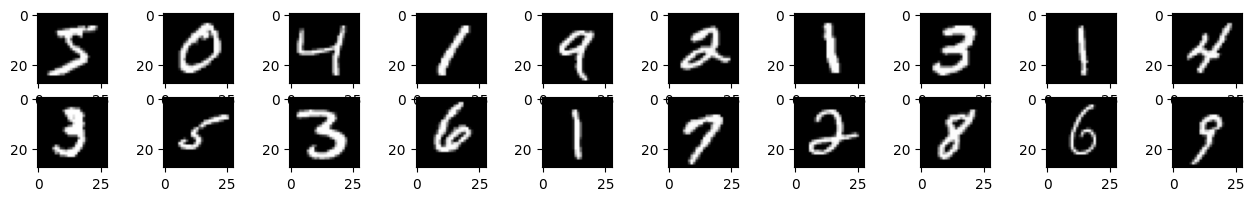

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,10,figsize = (16,2))

count = 0

for i in range(2):
  for j in range(10):
    axes[i,j].imshow(X_train[count], cmap = 'gray')
    count += 1

In [6]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [7]:
noise_factor = 0.1

X_train_noise = X_train + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_test.shape)

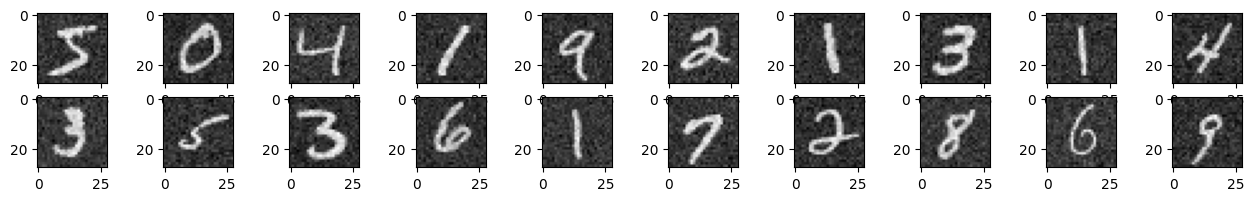

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,10,figsize = (16,2))

count = 0

for i in range(2):
  for j in range(10):
    axes[i,j].imshow(X_train_noise[count], cmap = 'gray')
    count += 1

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 28, 28, 1)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 28, 28, 1)

X_train_noise.shape

(60000, 28, 28, 1)

In [11]:
from keras.models import Model
from keras.layers import Input, MaxPool2D, UpSampling2D, Dense, Conv2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

In [12]:
encoder_input = Input(shape = (28,28,1))

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D((2,2), padding = 'same')(x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

encoded = MaxPool2D((2,2), padding = 'same')(x)

In [14]:
x = Conv2D(32, (3,3), activation= 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

In [15]:
autoencoder = Model(encoder_input, decoded)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,865 (112.75 KB)

 Trainable params: 28,609 (111.75 KB)

 Non-trainable params: 256 (1.00 KB)

In [16]:
autoencoder.compile(loss='binary_crossentropy', optimizer = 'adam')

In [19]:
checkpoint = ModelCheckpoint('denoising_model.h5', save_best_only = True, save_weights_only= False, verbose = 1)
history = autoencoder.fit(X_train_noise, X_train, epochs = 50, batch_size=128, callbacks = checkpoint, validation_split=0.25, verbose = 1)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0763
Epoch 1: val_loss improved from inf to 0.07441, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0763 - val_loss: 0.0744
Epoch 2/50
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0734
Epoch 2: val_loss improved from 0.07441 to 0.07438, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0734 - val_loss: 0.0744
Epoch 3/50
350/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719
Epoch 3: val_loss improved from 0.07438 to 0.07358, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0719 - val_loss: 0.0736
Epoch 4/50
347/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0712
Epoch 4: val_loss did not improve from 0.07358
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0712 - val_loss: 0.0742
Epoch 5/50
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0706
Epoch 5: val_loss improved from 0.07358 to 0.07097, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0706 - val_loss: 0.0710
Epoch 6/50
344/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0699
Epoch 6: val_loss improved from 0.07097 to 0.07044, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0699 - val_loss: 0.0704
Epoch 7/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0695
Epoch 7: val_loss did not improve from 0.07044
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0695 - val_loss: 0.0711
Epoch 8/50
348/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691
Epoch 8: val_loss improved from 0.07044 to 0.06934, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0691 - val_loss: 0.0693
Epoch 9/50
343/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687
Epoch 9: val_loss did not improve from 0.06934
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0687 - val_loss: 0.0695
Epoch 10/50
347/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0686
Epoch 10: val_loss did not improve from 0.06934
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0686 - val_loss: 0.0708
Epoch 11/50
350/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0685
Epoch 11: val_loss did not improve from 0.06934
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0685 - val_loss: 0.0696
Epoch 12/50
343/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0683
Epoch 12: val_loss improved from 0.06934 to 0.06857, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0683 - val_loss: 0.0686
Epoch 13/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0679
Epoch 13: val_loss improved from 0.06857 to 0.06842, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0679 - val_loss: 0.0684
Epoch 14/50
349/352 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0679 
Epoch 14: val_loss improved from 0.06842 to 0.06815, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0679 - val_loss: 0.0682
Epoch 15/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0677
Epoch 15: val_loss did not improve from 0.06815
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0677 - val_loss: 0.0685
Epoch 16/50
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0677
Epoch 16: val_loss improved from 0.06815 to 0.06803, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0677 - val_loss: 0.0680
Epoch 17/50
350/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674
Epoch 17: val_loss did not improve from 0.06803
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0674 - val_loss: 0.0686
Epoch 18/50
347/352 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0674
Epoch 18: val_loss did not improve from 0.06803
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0674 - val_loss: 0.0681
Epoch 19/50
344/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674
Epoch 19: val_loss improved from 0.06803 to 0.06773, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0674 - val_loss: 0.0677
Epoch 20/50
344/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0672
Epoch 20: val_loss improved from 0.06773 to 0.06770, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0672 - val_loss: 0.0677
Epoch 21/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0670
Epoch 21: val_loss did not improve from 0.06770
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0670 - val_loss: 0.0685
Epoch 22/50
348/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0671
Epoch 22: val_loss did not improve from 0.06770
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0671 - val_loss: 0.0677
Epoch 23/50
343/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0669
Epoch 23: val_loss improved from 0.06770 to 0.06759, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0669 - val_loss: 0.0676
Epoch 24/50
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670
Epoch 24: val_loss improved from 0.06759 to 0.06753, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0670 - val_loss: 0.0675
Epoch 25/50
348/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0668
Epoch 25: val_loss did not improve from 0.06753
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0668 - val_loss: 0.0678
Epoch 26/50
347/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0668
Epoch 26: val_loss did not improve from 0.06753
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0668 - val_loss: 0.0676
Epoch 27/50
350/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0669
Epoch 27: val_loss improved from 0.06753 to 0.06735, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0669 - val_loss: 0.0673
Epoch 28/50
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0666
Epoch 28: val_loss did not improve from 0.06735
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0666 - val_loss: 0.0674
Epoch 29/50
344/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0666
Epoch 29: val_loss improved from 0.06735 to 0.06717, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0666 - val_loss: 0.0672
Epoch 30/50
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667
Epoch 30: val_loss improved from 0.06717 to 0.06716, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0667 - val_loss: 0.0672
Epoch 31/50
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0665
Epoch 31: val_loss did not improve from 0.06716
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0665 - val_loss: 0.0674
Epoch 32/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0666
Epoch 32: val_loss did not improve from 0.06716
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0666 - val_loss: 0.0678
Epoch 33/50
347/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667
Epoch 33: val_loss did not improve from 0.06716
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0667 - val_loss: 0.0672
Epoch 34/50
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0664
Epoch 34: val_loss improved from 0.06716 to 0.06694, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0664 - val_loss: 0.0669
Epoch 35/50
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0665
Epoch 35: val_loss did not improve from 0.06694
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0665 - val_loss: 0.0670
Epoch 36/50
344/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0665
Epoch 36: val_loss did not improve from 0.06694
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0665 - val_loss: 0.0673
Epoch 37/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0664
Epoch 37: val_loss did not improve from 0.06694
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0664 - val_loss: 0.0670
Epoch 38/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664
Epoch 38: val_loss improved from 0.06694 to 0.06683, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0664 - val_loss: 0.0668
Epoch 39/50
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0663
Epoch 39: val_loss did not improve from 0.06683
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0663 - val_loss: 0.0670
Epoch 40/50
344/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0663
Epoch 40: val_loss did not improve from 0.06683
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0663 - val_loss: 0.0669
Epoch 41/50
348/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0662
Epoch 41: val_loss improved from 0.06683 to 0.06678, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0662 - val_loss: 0.0668
Epoch 42/50
344/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0662
Epoch 42: val_loss improved from 0.06678 to 0.06677, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0662 - val_loss: 0.0668
Epoch 43/50
347/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0663
Epoch 43: val_loss did not improve from 0.06677
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0663 - val_loss: 0.0670
Epoch 44/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0663
Epoch 44: val_loss improved from 0.06677 to 0.06672, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0663 - val_loss: 0.0667
Epoch 45/50
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0661
Epoch 45: val_loss did not improve from 0.06672
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0661 - val_loss: 0.0667
Epoch 46/50
348/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0661
Epoch 46: val_loss improved from 0.06672 to 0.06667, saving model to denoising_model.h5


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0661 - val_loss: 0.0667
Epoch 47/50
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0661
Epoch 47: val_loss did not improve from 0.06667
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0661 - val_loss: 0.0667
Epoch 48/50
344/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0661
Epoch 48: val_loss did not improve from 0.06667
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0661 - val_loss: 0.0670
Epoch 49/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660
Epoch 49: val_loss did not improve from 0.06667
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0660 - val_loss: 0.0667
Epoch 50/50
347/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0661
Epoch 50: val_loss did not improve from 0.06667
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0661 - val_loss: 0.0668


In [21]:
from keras.models import load_model
autoencoder = load_model('denoising_model.h5')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,867 (112.77 KB)

 Trainable params: 28,609 (111.75 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 2 (12.00 B)

In [22]:
def visualize_data(data, row, column):
  data = data.reshape(data.shape[0],28,28)
  count = 0
  fig, axes = plt.subplots(row,column,figsize = (16,4))
  for i in range(row):
    for j in range(column):
      axes[i,j].imshow(data[count], cmap = 'gray')
      count += 1

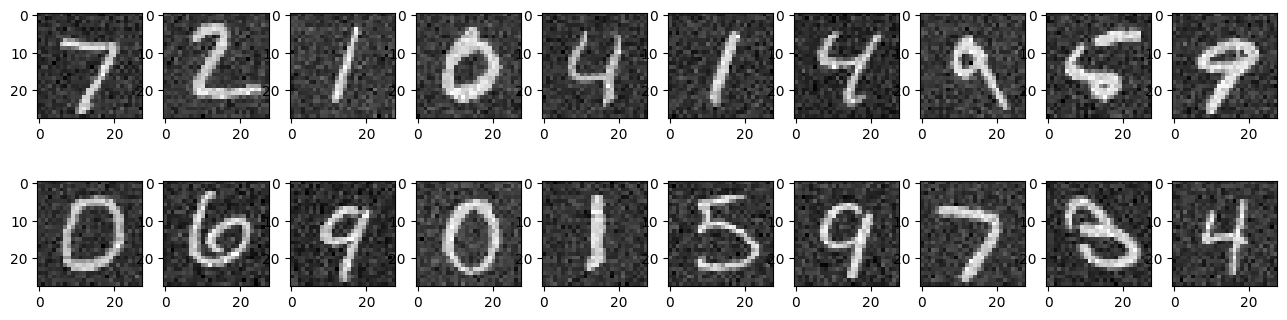

In [23]:
visualize_data(X_test_noise, 2, 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


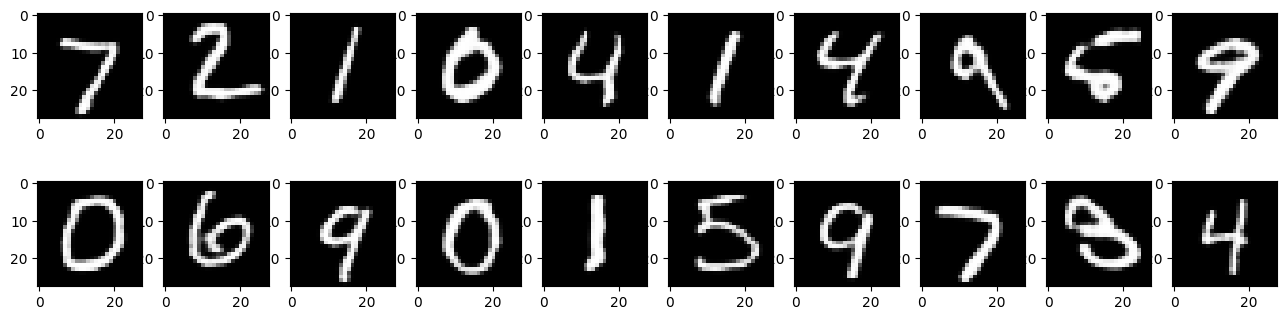

In [24]:
pred = autoencoder.predict(X_test_noise[:20])
visualize_data(pred, 2, 10)